In [20]:
from openai import OpenAI
import matplotlib.pyplot as plt
from io import StringIO
import pandas as pd
import re

# Create an OpenAI client with your deepinfra token and endpoint
openai = OpenAI(
    api_key="OfGI4S423AQ3XqY80Gm2SPWsb3aVKoZ9",
    base_url="https://api.deepinfra.com/v1/openai",
)

In [2]:
#1 uzduotis - text summarization
def read_article_from_file():
    try:
        with open("text.txt", 'r', encoding='utf-8') as file:
            return file.read()
    except Exception as e:
        print(f"Exception: {e}")

request_message = "Summarize this article in 5 sentences, return only the summary: \n" + read_article_from_file()

In [13]:
#2 uzduotis - text generation
request_message = "Write an 8 line poem about rocks"

In [12]:
#3 uzduotis - question answering
request_message = ("Answer these 4 questions for me: \n" + 
                   "What ASP.NET object is used to get information about the web servers ?\n" +
                   "What method(s) must be used with the Application object to ensure that only one process accesses a variable at a time ?\n" + #Three
                   "What HTML element is the asp:Label control rendered as when the target is Internet Explorer ?\n" +
                   "Can two different .net programming languages be mixed in a single ASPX file ?\n")

In [11]:
#4 uzduotis - data generation
request_message = "Generate data points of an artificial stock price chart for 30 days (30 data points). The price must have 2 numbers from the decimal point. You must return only the Y value in CSV format without extra words."

In [21]:
#5 uzduotis - code generation
request_message = """You are given a binary array nums.

You can do the following operation on the array any number of times (possibly zero):

Choose any 3 consecutive elements from the array and flip all of them.
Flipping an element means changing its value from 0 to 1, and from 1 to 0.

Return the minimum number of operations required to make all elements in nums equal to 1. If it is impossible, return -1.

(Here is a code snippet that you have to finish)
public class Solution {
    public int MinOperations(int[] nums) {
        
    }
}

Example 1:

Input: nums = [0,1,1,1,0,0]

Output: 3

Explanation:
We can do the following operations:

Choose the elements at indices 0, 1 and 2. The resulting array is nums = [1,0,0,1,0,0].
Choose the elements at indices 1, 2 and 3. The resulting array is nums = [1,1,1,0,0,0].
Choose the elements at indices 3, 4 and 5. The resulting array is nums = [1,1,1,1,1,1].
Example 2:

Input: nums = [0,1,1,1]

Output: -1

Explanation:
It is impossible to make all elements equal to 1.

 

Constraints:

3 <= nums.length <= 105
0 <= nums[i] <= 1"""

# LLM Modeliai

In [13]:
#1. DeepSeek R1
chat_completion = openai.chat.completions.create(
    model="deepseek-ai/DeepSeek-R1-Turbo",
    messages=[{"role": "user", "content": request_message}],
)

print(chat_completion.choices[0].message.content)

<think>
Okay, let's tackle these four ASP.NET questions one by one. I need to make sure I get each answer right. Let me start with the first one.

1. **What ASP.NET object is used to get information about the web servers?**

Hmm, ASP.NET has several intrinsic objects like Request, Response, Session, Application, Server, etc. The question is about getting server information. The Server object comes to mind because it provides methods and properties related to the server. For example, Server.MachineName gives the server's name. But wait, maybe there's another object. The HttpServerUtility class is the Server object. Also, sometimes the Request object can give server variables, but the primary one for server info is probably the Server object. So I think the answer is the Server object.

2. **What method(s) must be used with the Application object to ensure that only one process accesses a variable at a time?**

The Application object is used for application-wide state. Since it's shared 

In [14]:
#2. QwQ
chat_completion = openai.chat.completions.create(
    model="Qwen/QwQ-32B",
    messages=[{"role": "user", "content": request_message}],
)

print(chat_completion.choices[0].message.content)

Okay, I need to answer four questions about ASP.NET. Let's go through them one by one.

First question: What ASP.NET object is used to get information about the web servers?

Hmm, I remember that in ASP.NET, there are several built-in objects like Request, Response, Server, Application, Session, etc. The question is about getting information about the web server itself. The Server object might be the one here. Wait, the Request object gets client info, right? The Server object provides methods for server-related operations. There's a property like MachineName, maybe? Or perhaps the HttpWorkerRequest? No, I think the Server object can give server-side information. Let me recall, Server.MapPath is a common method. But does it provide info about the server like its name, version, etc.? Alternatively, maybe the HttpContext object? Or perhaps the System.Web.HttpRuntime Cache? Wait, maybe the correct answer is the Server object. Let me check mentally examples. For server variables, like serv

In [15]:
#3. Llama 3.3
chat_completion = openai.chat.completions.create(
    model="meta-llama/Llama-3.3-70B-Instruct-Turbo",
    messages=[{"role": "user", "content": request_message}],
)

print(chat_completion.choices[0].message.content)

Here are the answers to your questions:

1. **What ASP.NET object is used to get information about the web servers?**
   The `Server` object in ASP.NET is used to get information about the web server and to perform certain tasks.

2. **What method(s) must be used with the Application object to ensure that only one process accesses a variable at a time?**
   To ensure that only one process accesses a variable at a time when using the `Application` object, you should use the `Lock` and `Unlock` methods. These methods are used to synchronize access to the application state, preventing concurrent access and modifications by multiple requests.

3. **What HTML element is the asp:Label control rendered as when the target is Internet Explorer?**
   The `asp:Label` control in ASP.NET is typically rendered as a `span` HTML element, regardless of the target browser, including Internet Explorer.

4. **Can two different.NET programming languages be mixed in a single ASPX file?**
   No, by default, 

In [16]:
#4. phi-4
chat_completion = openai.chat.completions.create(
    model="microsoft/phi-4",
    messages=[{"role": "user", "content": request_message}],
)

print(chat_completion.choices[0].message.content)

Certainly! Here are the answers to your questions:

1. **What ASP.NET object is used to get information about the web servers?**
   - The `HttpServerUtility` object is used to get information about the web server. It is accessible via the `Server` property of `HttpContext`.

2. **What method(s) must be used with the Application object to ensure that only one process accesses a variable at a time?**
   - To ensure thread safety when accessing shared data in the `Application` object, you should use the `Application.Lock()` and `Application.Unlock()` methods. This prevents concurrent access by different processes.

3. **What HTML element is the `asp:Label` control rendered as when the target is Internet Explorer?**
   - The `asp:Label` control is rendered as a `<span>` element. This applies regardless of the browser, as ASP.NET controls are generally browser-agnostic.

4. **Can two different .NET programming languages be mixed in a single ASPX file?**
   - Yes, you can mix different .NET 

In [22]:
#5. Mistral
chat_completion = openai.chat.completions.create(
    model="mistralai/Mistral-Small-24B-Instruct-2501",
    messages=[{"role": "user", "content": request_message}],
)

print(chat_completion.choices[0].message.content)

To solve this problem, we need to determine the minimum number of operations required to make all elements in the given binary array `nums` equal to 1. The operation allows us to flip any three consecutive elements. Here's a step-by-step approach to solve the problem:

1. **Initial Check**:
   - If the length of `nums` is less than 3, we cannot perform any operations since the operation requires at least three elements. If length is 3 and all elements are 1's, no operation is needed. If any of the elements are 0, it is impossible to make all elements 1
   - If the entire array is already all 1's, the answer is 0.

2. **Greedily Flip Consecutive 0's**:
   - Traverse the array and count the number of 0s consecutively. These  are to be flipped.
   - If we encounter a consecutive block of 3 or more 0s, we can flip them in one operation.
   - Profiling the number of zeros helps us reducing the problem.

3. **Remaining Elements**:
 - If at the end there are fewer than 3 0's and it is impossi

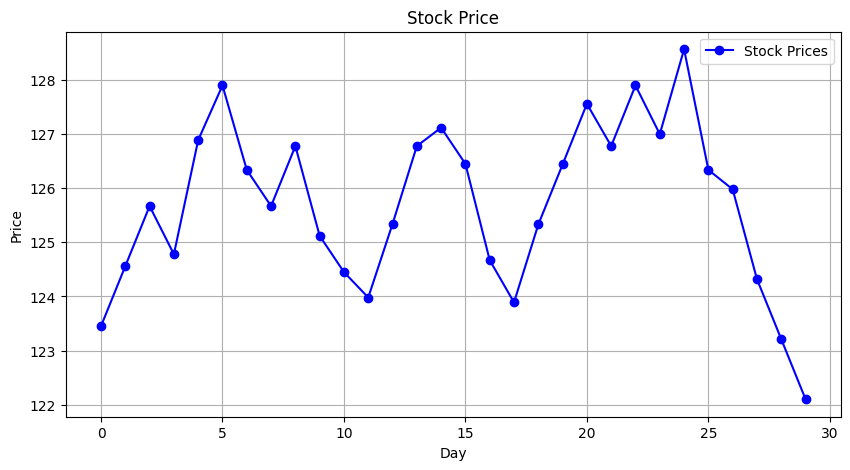

In [29]:
#4 uzduotis - data generation (charts)
def remove_think_tags(text: str) -> str:
    if text.startswith("<"):
        return re.sub(r'<think>.*?</think>', '', text, flags=re.DOTALL).strip()
    return text

text = chat_completion.choices[0].message.content
cleaned_text = remove_think_tags(text)

values = list(map(float, cleaned_text.split(',')))
plt.figure(figsize=(10, 5))
plt.plot(values, marker='o', linestyle='-', color='b', label='Stock Prices')
plt.xlabel('Day')
plt.ylabel('Price')
plt.title('Stock Price')
plt.legend()
plt.grid(True)
plt.show()